# Logistic Regression

In [1]:
import pandas as pd
import numpy as np                   
import seaborn as sn
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import seaborn as sns
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r'S:\DATA SCIENCE\EXTRACTED\Final Problem\train_data.csv')
test = pd.read_csv(r'S:\DATA SCIENCE\EXTRACTED\Final Problem\test_data.csv')

In [3]:
test.columns,train.columns

(Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome'],
       dtype='object'),
 Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome', 'subscribed'],
       dtype='object'))

In [4]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [5]:
train.dtypes,test.dtypes

(ID             int64
 age            int64
 job           object
 marital       object
 education     object
 default       object
 balance        int64
 housing       object
 loan          object
 contact       object
 day            int64
 month         object
 duration       int64
 campaign       int64
 pdays          int64
 previous       int64
 poutcome      object
 subscribed    object
 dtype: object,
 ID            int64
 age           int64
 job          object
 marital      object
 education    object
 default      object
 balance       int64
 housing      object
 loan         object
 contact      object
 day           int64
 month        object
 duration      int64
 campaign      int64
 pdays         int64
 previous      int64
 poutcome     object
 dtype: object)

In [6]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [7]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


Performing Univariate Analysis

In [8]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [9]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

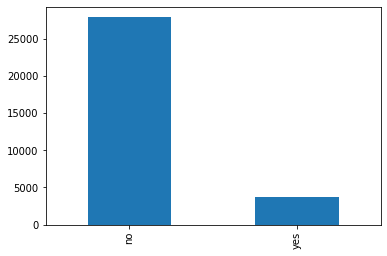

In [10]:
train['subscribed'].value_counts().plot.bar()

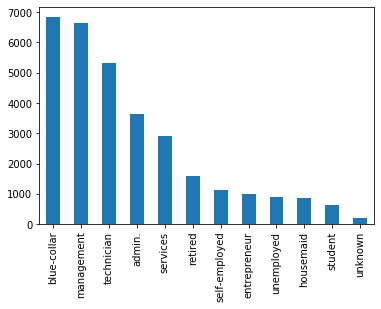

In [11]:
train['job'].value_counts().plot.bar()

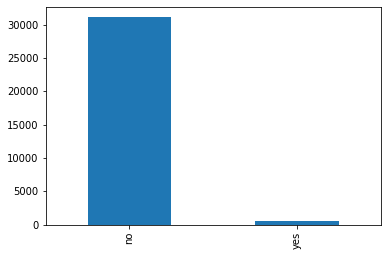

In [12]:
train['default'].value_counts().plot.bar()

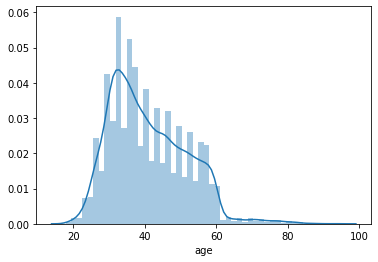

In [13]:
sn.distplot(train["age"])

Performing Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

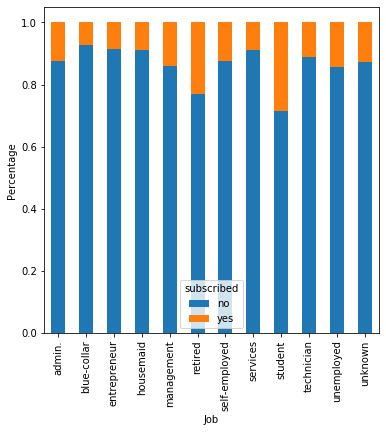

In [14]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

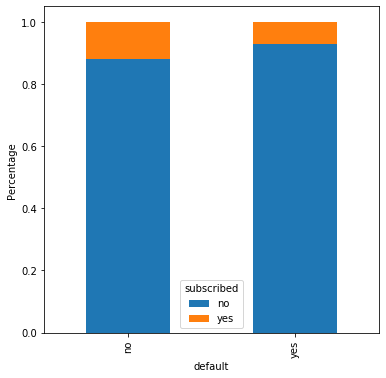

In [15]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.xlabel('default')
plt.ylabel('Percentage')

In [16]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

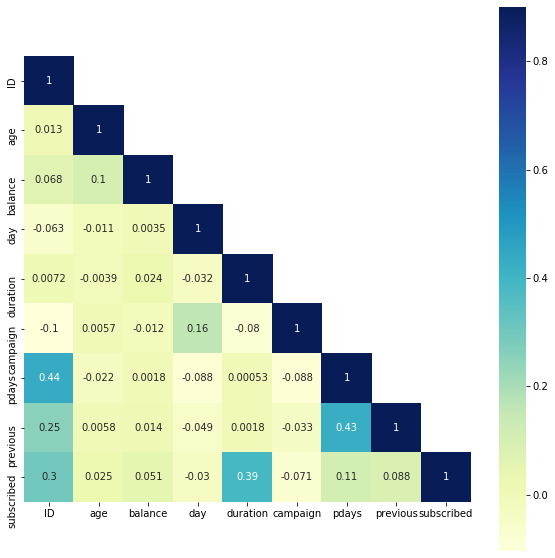

In [17]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [18]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Training and building the model

In [19]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [20]:
train = pd.get_dummies(train)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_x, val_x,train_y, val_y = train_test_split(train, target, test_size = 0.25, random_state=56)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
pred = lr.predict(val_x)

In [27]:
from sklearn.metrics import accuracy_score as acc
acc(val_y, pred)

0.8863751263902933

Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [30]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [31]:
prediction = clf.predict(val_x)

In [32]:
acc(val_y, prediction)

0.9044489383215369

In [33]:
test = pd.get_dummies(test)

In [34]:
test_pred = clf.predict(test)

In [35]:
submission = pd.DataFrame()

In [36]:
submission['ID'] = test['ID']
submission['subscribed'] = test_pred

In [37]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [38]:
submission.to_csv('submission_file.csv', header=True, index=False)